<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import spacy
import pandas as pd

unable to import 'smart_open.gcs', disabling that module


In [2]:
df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.shape

(28332, 24)

In [3]:
list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs']

In [4]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [5]:
df['reviews.numHelpful']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
28327    0.0
28328    0.0
28329    0.0
28330    0.0
28331    0.0
Name: reviews.numHelpful, Length: 28332, dtype: float64

In [6]:
df = df[df['primaryCategories'] == 'Electronics'].copy()

In [7]:
nlp = spacy.load("en_core_web_lg")

In [8]:
tokens = []

for doc in nlp.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
            
    tokens.append(doc_tokens)
        
df['tokens'] = tokens

del tokens

In [9]:
df.tokens.head()

8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, standard, echo, con, old, generation, ec...
Name: tokens, dtype: object

In [10]:
id2word = Dictionary(df['tokens'])
print(len(id2word))

6301


In [11]:
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

2162


Creating Corpus Object

In [12]:
corpus = [id2word.doc2bow(d) for d in df['tokens']]

In [13]:
model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=8, passes=50)

In [14]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

In [15]:
topics = [' '.join(t[0:5]) for t in words]

In [16]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
love buy old year tablet

------ Topic 1 ------
tablet good price ipad buy

------ Topic 2 ------
easy use great tablet love

------ Topic 3 ------
tablet amazon app fire google

------ Topic 4 ------
kindle fire screen new love

------ Topic 5 ------
love gift great buy tablet

------ Topic 6 ------
great tablet good price movie

------ Topic 7 ------
device sound speaker alexa amazon

------ Topic 8 ------
book read light tablet reader

------ Topic 9 ------
kid tablet love app time



In [17]:
distro = [model[d] for d in corpus]
num_topics = 10

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            # Topic is Tuple where the first part is the topic id
            # the second part is the topic distribution in that doc
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [18]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.076710 -0.080284       1        1  13.015244
9     -0.129143  0.056348       2        1  12.555686
4      0.076059  0.066157       3        1  11.829511
7      0.140758  0.059879       4        1  10.506053
1      0.128270  0.046338       5        1   9.960485
3      0.122205  0.069479       6        1   9.038542
0     -0.234394  0.148021       7        1   8.891043
5     -0.185577 -0.047165       8        1   8.566653
8      0.073172 -0.072308       9        1   8.200813
2     -0.068059 -0.246466      10        1   7.435964, topic_info=          Term         Freq        Total Category  logprob  loglift
68        easy  2548.000000  2548.000000  Default  30.0000  30.0000
203        use  3330.000000  3330.000000  Default  29.0000  29.0000
5         love  4564.000000  4564.000000  Default  28.0000  28.0000
685     kindle  2480.000000  2480.000000  Default  27.0000  27.0000
83         old  1883.000000  1883.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
169  recommend    91.843307   804.155090  Topic10  -5.0150   0.4291
137     screen    97.313293  1381.183105  Topic10  -4.9571  -0.0539
4          lot    86.064919   681.664124  Topic10  -5.0800   0.5294
42        work    96.781029  1630.195435  Topic10  -4.9626  -0.2252
90       price    87.911674  1977.927124  Topic10  -5.0587  -0.5146

[764 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
942       1  0.230420       $
942       3  0.075990       $
942       4  0.004903       $
942       5  0.333374       $
942       6  0.340727       $
...     ...       ...     ...
1016      2  0.239473      yr
1016      7  0.746266      yr
1016     10  0.005569      yr
429       4  0.930480  zipper
2015      3  0.919395       ©

[1988 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 5, 8, 2, 4, 1, 6, 9, 3])

In [19]:

topics = pd.DataFrame.from_records(new_distro)
topics.head()

,0,1,2,3,4,5,6,7,8,9
0,0.012504,0.012503,0.012505,0.012502,0.012505,0.428694,0.012504,0.012505,0.199724,0.284055
1,0.000000,0.138369,0.000000,0.000000,0.137615,0.000000,0.000000,0.494061,0.000000,0.217947
2,0.033334,0.033340,0.033335,0.699979,0.033335,0.033334,0.033338,0.033336,0.033335,0.033335
3,0.000000,0.180481,0.000000,0.000000,0.361833,0.000000,0.040253,0.291575,0.000000,0.121181
4,0.000000,0.340180,0.000000,0.000000,0.389797,0.000000,0.000000,0.216155,0.000000,0.000000


In [20]:
df['primary_topic'] = topics.idxmax(axis=1)

In [21]:
df[['primary_topic', 'reviews.rating']].groupby('primary_topic').mean()

,reviews.rating
primary_topic,
0.0,4.616541
1.0,4.445714
2.0,4.690058
3.0,4.655172
4.0,4.609091
5.0,4.616327
6.0,4.568238
7.0,4.522727
8.0,4.568627


In [22]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens,primary_topic
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, place, husband, love, hold, lot,...",3.0
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[discard, get, rid, broken, cd, case, broken, ...",5.0
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[dollar, boycott, amazon]",0.0
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[initial, impression, good, material, nice, sh...",6.0
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pro, standard, echo, con, old, generation, ec...",8.0


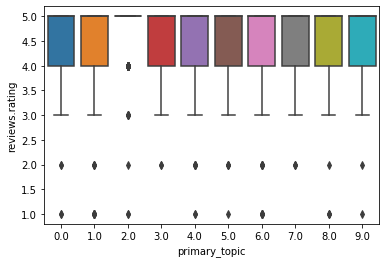

In [23]:
import seaborn as sns

ax = sns.boxplot(x="primary_topic", y="reviews.rating",
                 data=df)

In [24]:
topics_df = pd.DataFrame.from_records(new_distro)
topics_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.012504,0.012503,0.012505,0.012502,0.012505,0.428694,0.012504,0.012505,0.199724,0.284055
1,0.000000,0.138369,0.000000,0.000000,0.137615,0.000000,0.000000,0.494061,0.000000,0.217947
2,0.033334,0.033340,0.033335,0.699979,0.033335,0.033334,0.033338,0.033336,0.033335,0.033335
3,0.000000,0.180481,0.000000,0.000000,0.361833,0.000000,0.040253,0.291575,0.000000,0.121181
4,0.000000,0.340180,0.000000,0.000000,0.389797,0.000000,0.000000,0.216155,0.000000,0.000000


In [25]:
#Have no idea where these extra columns are coming from.
#topics_df = topics_df.drop([10,11,12,13,14,15,16,17,18,19], axis=1)

In [26]:
topics_df['primaryTopic'] = topics_df.idxmax(axis=1)
topics_df['numHelpful'] = df['reviews.numHelpful']

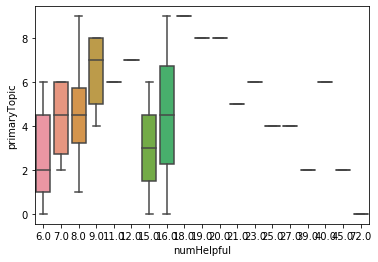

In [27]:
sns.boxplot(x="numHelpful", y="primaryTopic",  data=topics_df[(topics_df['numHelpful'] > 5) & (topics_df['numHelpful'] < 100)]);

##Findings:
* It doesn't seem like the topic is terribly indicative of how helpful that review will be.
* It also doesn't seem like the topic is all that indicative of review score.


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling